In [1]:
import pandas as pd

los_speed_path = 'data/los_speed.csv'
los_adj_path = 'data/los_adj.csv'

los_speed = pd.read_csv(los_speed_path)
los_adj = pd.read_csv(los_adj_path, header=None)

los_speed_head = los_speed.head()
los_adj_head = los_adj.head()


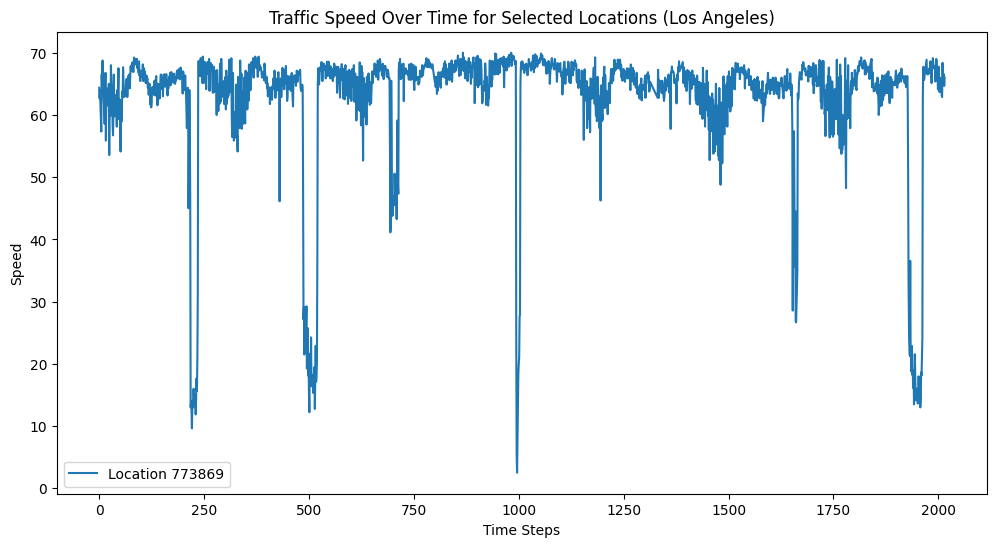

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot speed data over time for selected locations
# Selecting random 5 locations for visualization
locations = los_speed.columns[:1]

plt.figure(figsize=(12, 6))
for loc in locations:
    plt.plot(los_speed[loc], label=f'Location {loc}')

plt.title('Traffic Speed Over Time for Selected Locations (Los Angeles)')
plt.xlabel('Time Steps')
plt.ylabel('Speed')
plt.legend()
plt.show()

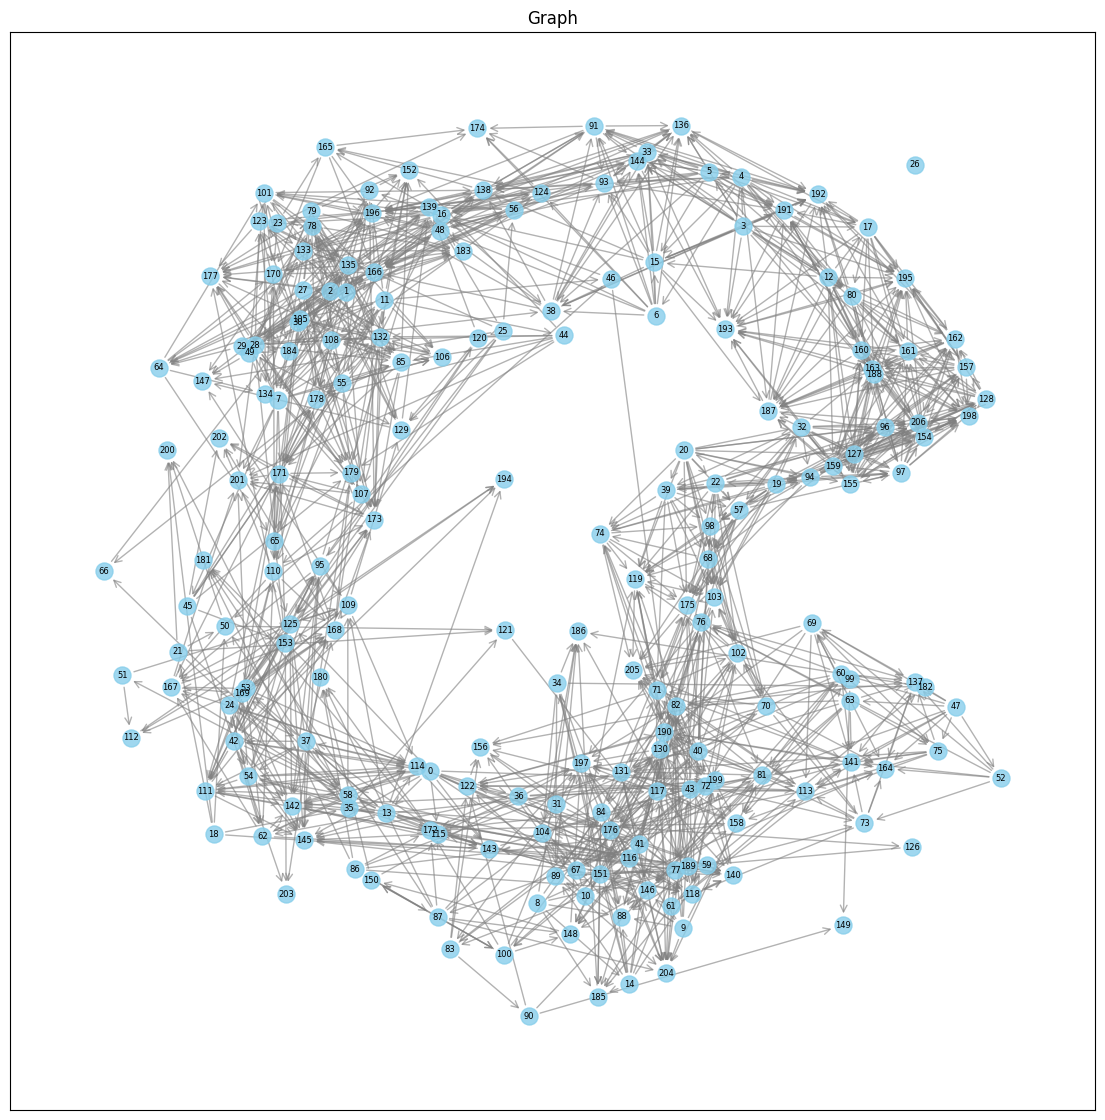

In [4]:
import networkx as nx
import numpy as np

los_adj = pd.read_csv(los_adj_path, header=None)
los_adj = los_adj - np.eye(los_adj.shape[0])
adj_matrix = los_adj.values
G = nx.from_numpy_array(adj_matrix)

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(los_adj.values)

# Checking if the matrix is symmetric to determine if the graph is directed
is_symmetric = np.allclose(los_adj, adj_matrix.T)

# Create a directed graph if the matrix is not symmetric
if not is_symmetric:
    G_directed = nx.from_numpy_matrix(adj_matrix, create_using=nx.DiGraph())
else:
    G_directed = nx.from_numpy_array(adj_matrix)


plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G_directed, seed=42, k=0.35)

nx.draw_networkx_nodes(G_directed, pos, node_color='skyblue', node_size=150, alpha=0.8)
nx.draw_networkx_edges(G_directed, pos, edge_color='gray', width=1.0, alpha=0.6, arrows=True, arrowstyle='->', arrowsize=12)
nx.draw_networkx_labels(G_directed, pos, font_size=6)

plt.title('Graph')
plt.show()
